In [29]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import permutations

plt.rc('font', family='gulim')

# 바탕화면 경로 가져오기
desktop_path = os.path.expanduser("~/Desktop")

# 파일 경로 설정
file_path = os.path.join(desktop_path, '물품_정보_세부_카테고리_분류.xlsx')

# 특정 시트만 불러오기 (예: 'Sheet1'이라는 시트)
df = pd.read_excel(file_path)

# 데이터프레임 확인
df.head()

,항목,가로(mm),세로(mm),높이(mm),중량(g),취급주의,세부_카테고리
0,콘푸러스트 시리얼,307.3,251.5,381.0,36.3,0,가공식품
1,SKIPPY 땅콩 잼,225.8,225.8,354.8,751.3,0,가공식품
2,하리보 젤리,25.4,25.4,25.4,2.0,0,제과류
3,POPS 막대 사탕,313.9,249.9,79.0,979.8,0,제과류
4,페로로쉐 초콜릿,310.1,40.1,272.5,524.5,0,제과류


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   항목       483 non-null    object 
 1   가로(mm)   483 non-null    float64
 2   세로(mm)   483 non-null    float64
 3   높이(mm)   483 non-null    float64
 4   중량(g)    483 non-null    float64
 5   취급주의     483 non-null    int64  
 6   세부_카테고리  483 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 26.5+ KB


In [4]:
df.head()

,항목,가로(mm),세로(mm),높이(mm),중량(g),취급주의,세부_카테고리
0,콘푸러스트 시리얼,307.3,251.5,381.0,36.3,0,가공식품
1,SKIPPY 땅콩 잼,225.8,225.8,354.8,751.3,0,가공식품
2,하리보 젤리,25.4,25.4,25.4,2.0,0,제과류
3,POPS 막대 사탕,313.9,249.9,79.0,979.8,0,제과류
4,페로로쉐 초콜릿,310.1,40.1,272.5,524.5,0,제과류


In [5]:
df.describe()

,가로(mm),세로(mm),높이(mm),중량(g),취급주의
count,483.000000,483.000000,483.000000,483.000000,483.000000
mean,214.728720,154.354331,117.963530,856.653408,0.136646
std,129.780103,95.951584,92.837365,1547.524198,0.343829
min,2.200000,2.794000,0.200000,0.300000,0.000000
25%,115.697000,80.500000,48.761000,140.300000,0.000000
50%,191.008000,135.100000,94.000000,330.000000,0.000000
75%,304.800000,209.600000,168.947000,834.550000,0.000000
max,1270.000000,789.940000,490.000000,16782.000000,1.000000


In [6]:
df.isnull().sum()

항목         0
가로(mm)     0
세로(mm)     0
높이(mm)     0
중량(g)      0
취급주의       0
세부_카테고리    0
dtype: int64

In [7]:
category_stats = df.groupby('세부_카테고리').describe()
print(category_stats)

          가로(mm)                                                           \
           count        mean         std    min      25%     50%      75%   
세부_카테고리                                                                     
가공식품        34.0  171.120588  108.458736   33.3   78.850  137.50  276.025   
건강기능식품       5.0  338.500000   87.338708  190.2  342.600  354.50  398.800   
그 밖의 화장품류   41.0  119.477561   83.381232   19.1   50.000   97.00  181.100   
세정용 화장품류    15.0  117.712667   68.491071   50.8   64.740   79.21  177.500   
세제류         11.0  161.981455   88.292759   60.0   96.300  127.00  207.855   
음료           5.0  286.260000  163.977462  105.4  108.000  401.00  403.900   
의류           7.0  247.628571  101.055294  127.0  165.000  254.00  317.250   
의약외품류       20.0  211.400000  118.484714   33.0  126.275  197.85  276.025   
잡화류        251.0  244.333936  135.177127   25.0  148.557  239.00  322.961   
전자제품류       84.0  204.632000  122.692993    2.2   98.750  184.00  297.750   

In [8]:
# 세부 카테고리와 취급주의별로 수치형 컬럼만 평균 계산
handling_stats = df.groupby(['세부_카테고리', '취급주의'])[['가로(mm)', '세로(mm)', '높이(mm)', '중량(g)']].mean()

# 결과 확인
print(handling_stats)

                    가로(mm)      세로(mm)      높이(mm)        중량(g)
세부_카테고리   취급주의                                                 
가공식품      0     168.610000  154.196667  178.756667  1460.083333
          1     189.950000  116.400000  151.925000  1790.775000
건강기능식품    0     338.500000  235.700000  228.020000   365.160000
그 밖의 화장품류 0     111.562667   81.340000  102.832000   227.326667
          1     141.063636   81.109091   89.472727   216.927273
세정용 화장품류  0     117.712667   71.904667  127.480000   381.946667
세제류       0     161.981455  109.358727  166.283273  1271.509091
음료        0     286.260000  211.480000  120.600000  3444.460000
의류        0     247.628571  220.537143   39.712857   317.771429
의약외품류     0     211.400000  155.433500  179.885000   254.320000
잡화류       0     243.957845  164.573536  102.107506   765.636464
          1     249.202222  160.455333  100.836778  1073.433333
전자제품류     0     205.620353  179.007216  135.262784  1332.896078
          1     203.104545  155.781758  

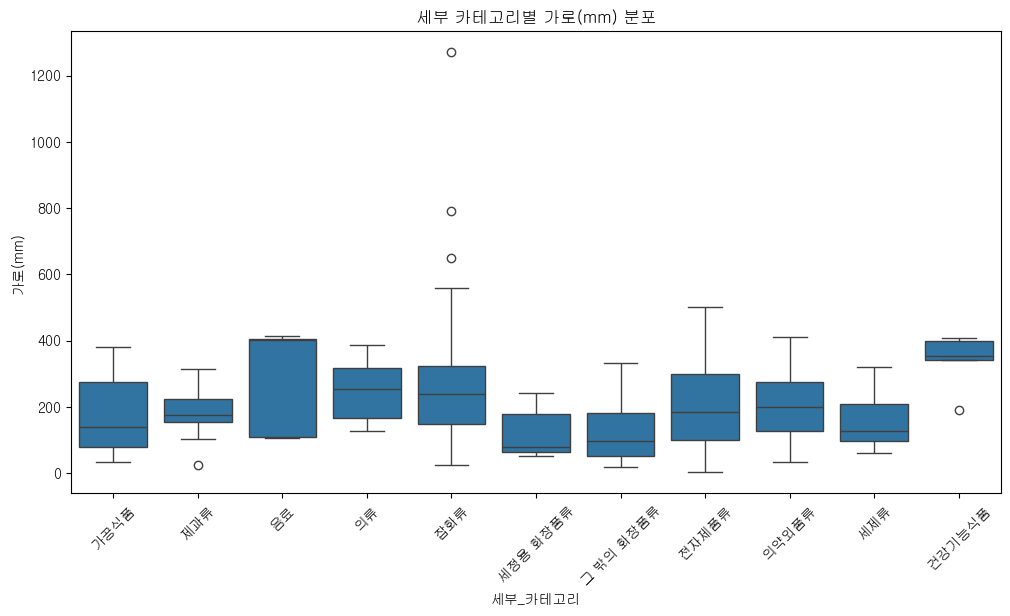

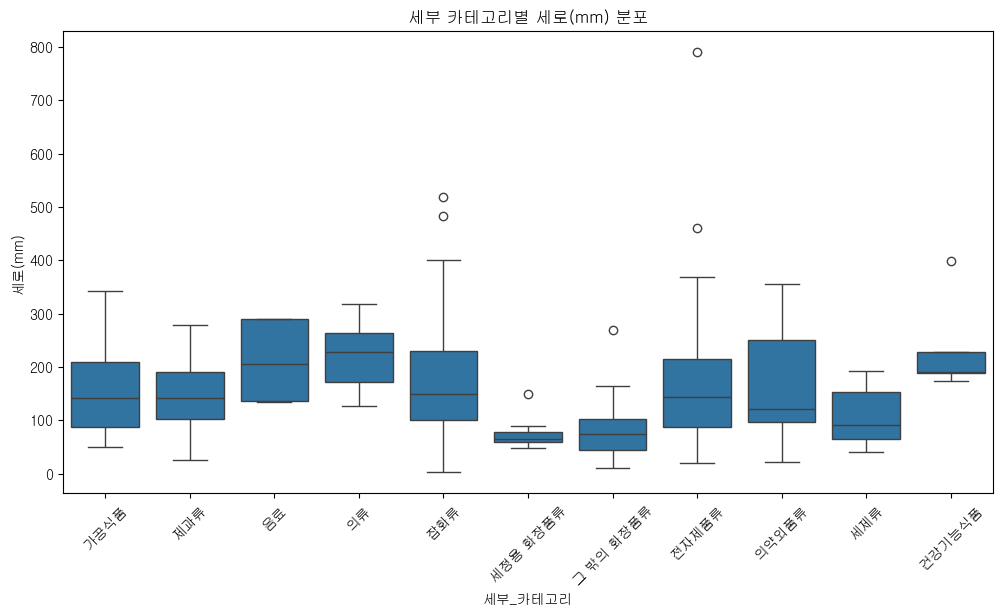

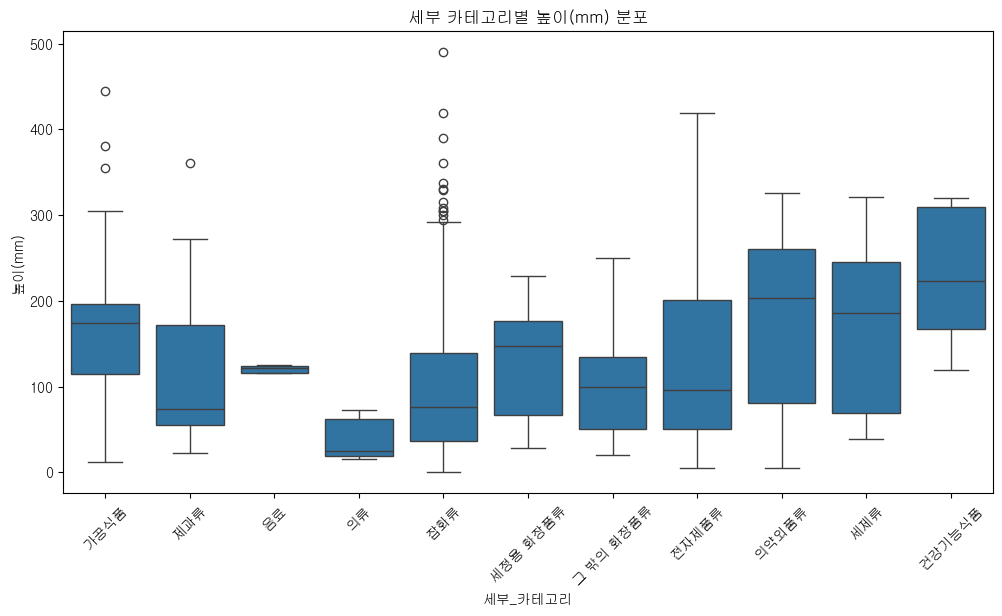

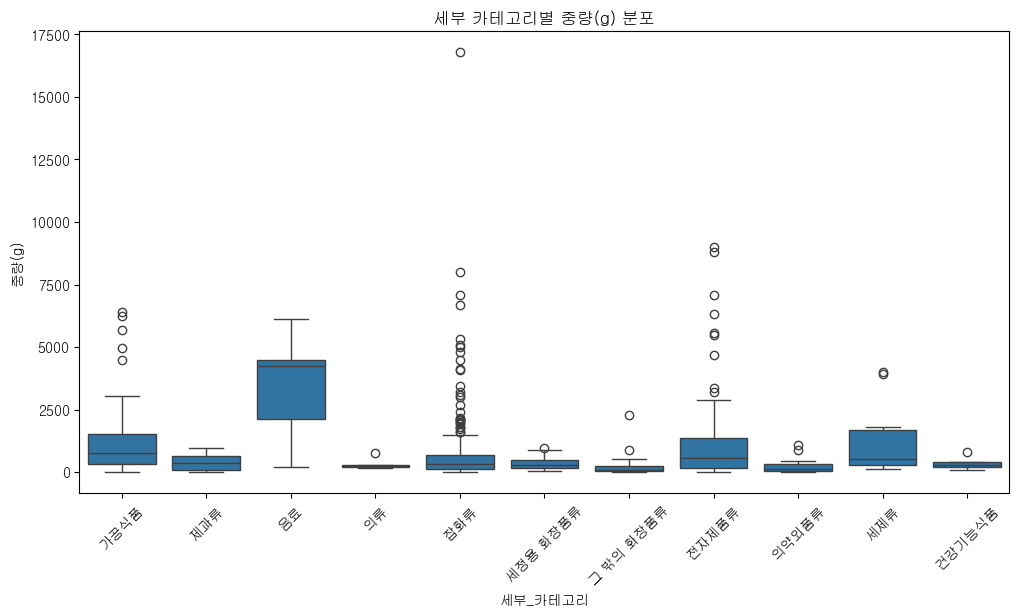

In [9]:

# 세부 카테고리별 가로, 세로, 높이, 무게의 분포
# Figure 크기를 조정하여 x축 간격 확보
plt.figure(figsize=(12, 6))  # 가로 12, 세로 6 크기
sns.boxplot(x='세부_카테고리', y='가로(mm)', data=df)
plt.title('세부 카테고리별 가로(mm) 분포')
plt.xticks(rotation=45)  # x축 라벨 45도 회전
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='세부_카테고리', y='세로(mm)', data=df)
plt.title('세부 카테고리별 세로(mm) 분포')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='세부_카테고리', y='높이(mm)', data=df)
plt.title('세부 카테고리별 높이(mm) 분포')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='세부_카테고리', y='중량(g)', data=df)
plt.title('세부 카테고리별 중량(g) 분포')
plt.xticks(rotation=45)
plt.show()

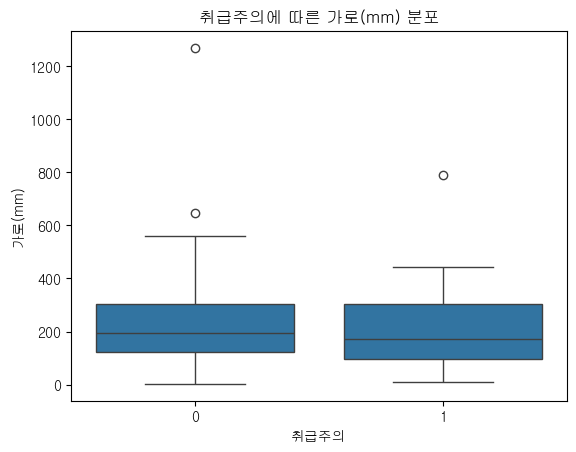

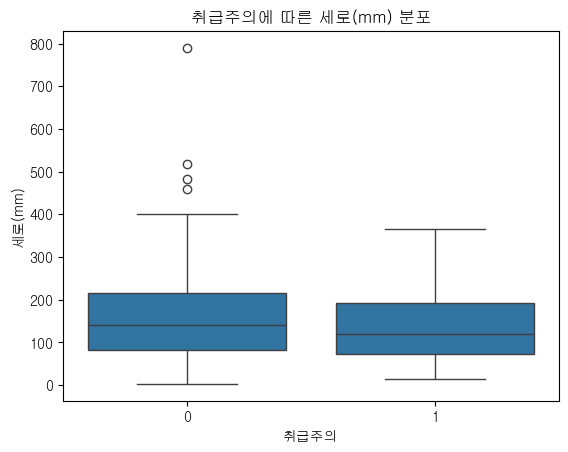

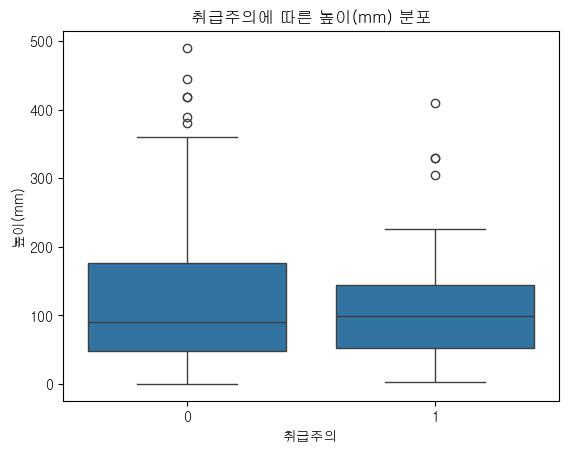

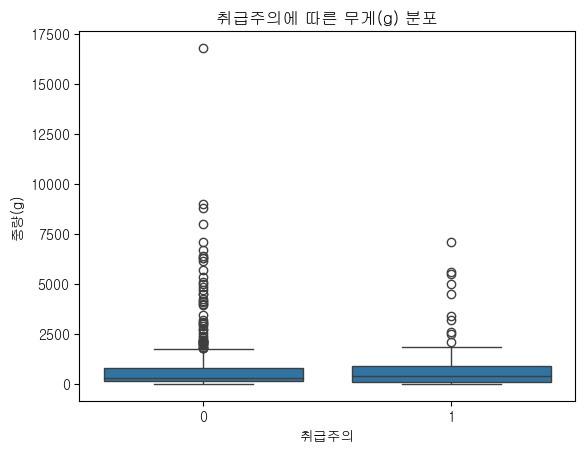

In [10]:
sns.boxplot(x='취급주의', y='가로(mm)', data=df)
plt.title('취급주의에 따른 가로(mm) 분포')
plt.show()

sns.boxplot(x='취급주의', y='세로(mm)', data=df)
plt.title('취급주의에 따른 세로(mm) 분포')
plt.show()

sns.boxplot(x='취급주의', y='높이(mm)', data=df)
plt.title('취급주의에 따른 높이(mm) 분포')
plt.show()

sns.boxplot(x='취급주의', y='중량(g)', data=df)
plt.title('취급주의에 따른 무게(g) 분포')
plt.show()


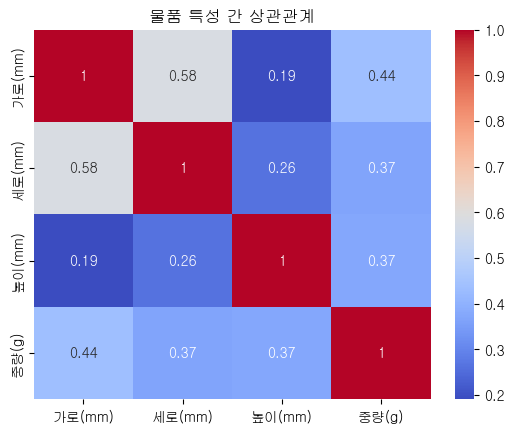

In [11]:
sns.heatmap(df[['가로(mm)', '세로(mm)', '높이(mm)', '중량(g)']].corr(), annot=True, cmap='coolwarm')
plt.title('물품 특성 간 상관관계')
plt.show()

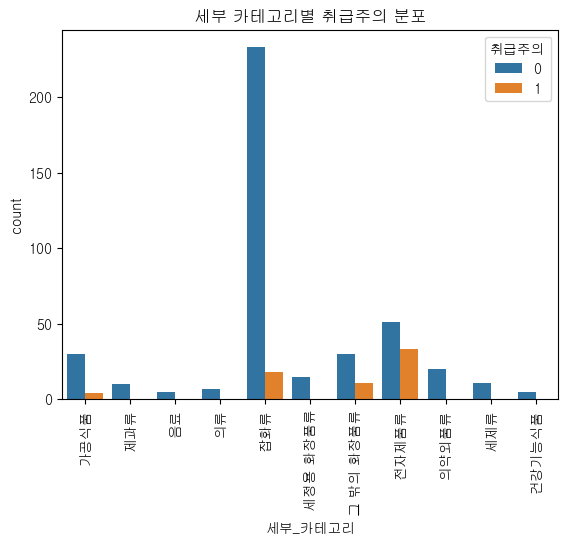

In [12]:
sns.countplot(x='세부_카테고리', hue='취급주의', data=df)
plt.title('세부 카테고리별 취급주의 분포')
plt.xticks(rotation=90)
plt.show()

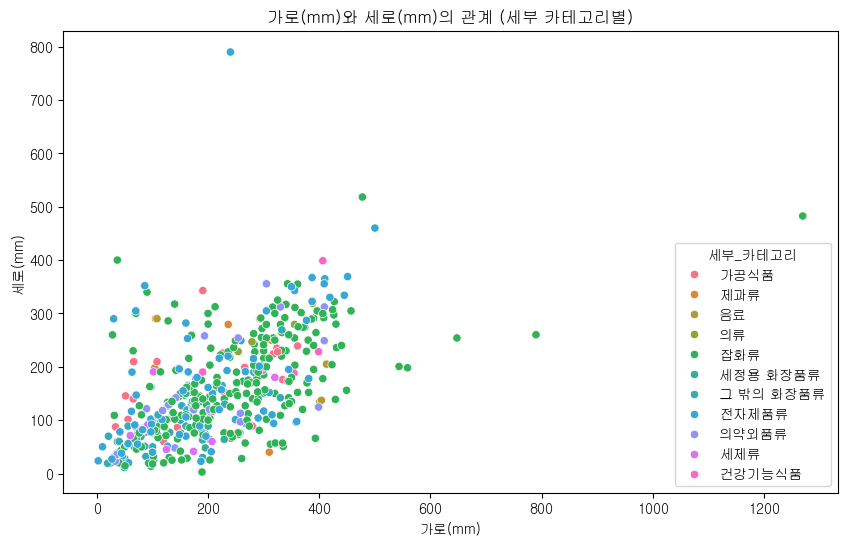

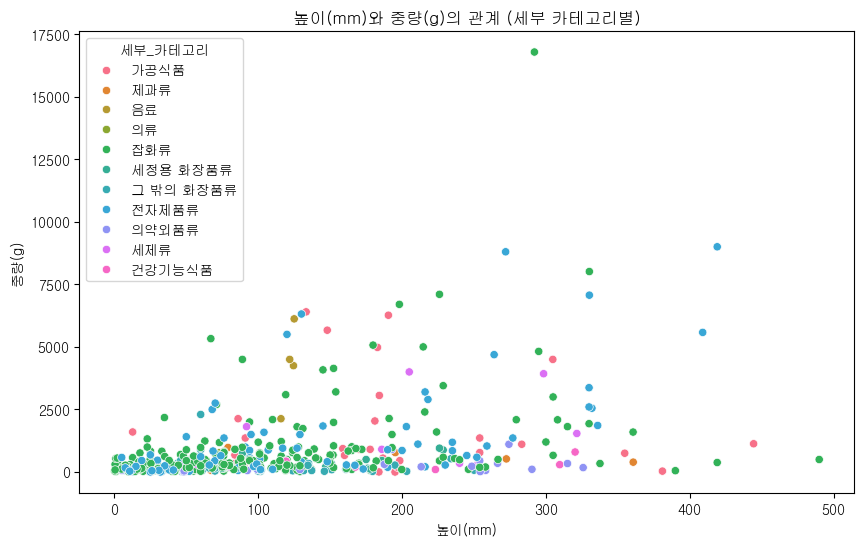

In [13]:
# 2. 산포도 (가로와 세로, 높이와 중량 간 관계)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='가로(mm)', y='세로(mm)', hue='세부_카테고리', data=df)
plt.title('가로(mm)와 세로(mm)의 관계 (세부 카테고리별)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='높이(mm)', y='중량(g)', hue='세부_카테고리', data=df)
plt.title('높이(mm)와 중량(g)의 관계 (세부 카테고리별)')
plt.show()


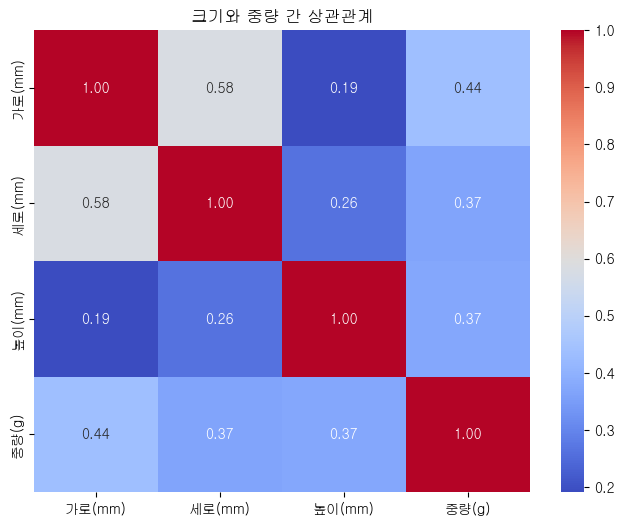

In [14]:
# 4. 히트맵: 크기와 중량 간 상관관계
correlation = df[['가로(mm)', '세로(mm)', '높이(mm)', '중량(g)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('크기와 중량 간 상관관계')
plt.show()

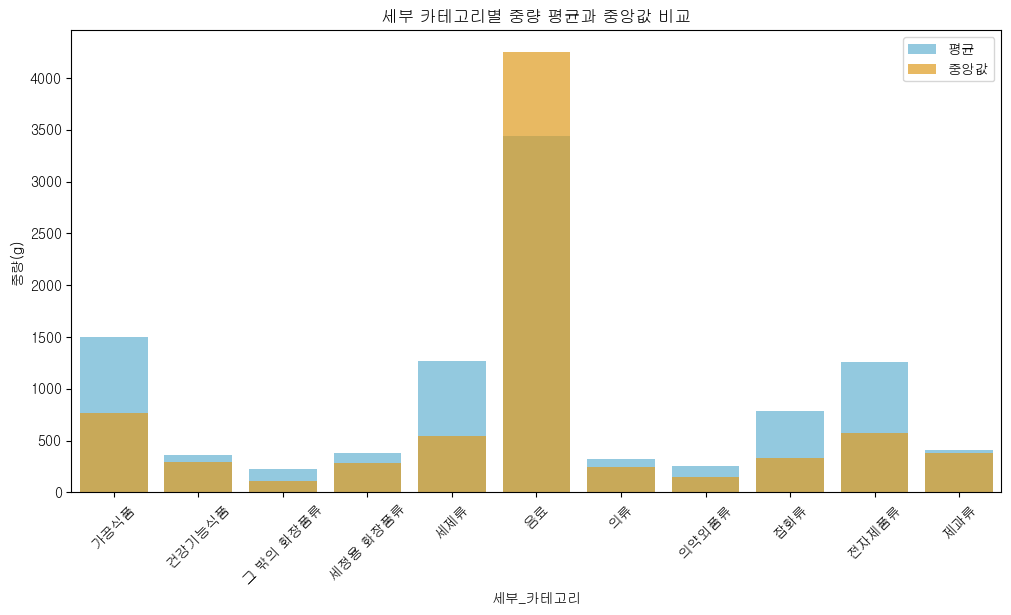

In [15]:
# 1. 세부 카테고리별 평균과 중앙값 비교
category_mean = df.groupby('세부_카테고리')[['가로(mm)', '세로(mm)', '높이(mm)', '중량(g)']].mean().reset_index()
category_median = df.groupby('세부_카테고리')[['가로(mm)', '세로(mm)', '높이(mm)', '중량(g)']].median().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='세부_카테고리', y='중량(g)', data=category_mean, color='skyblue', label='평균')
sns.barplot(x='세부_카테고리', y='중량(g)', data=category_median, color='orange', alpha=0.7, label='중앙값')
plt.title('세부 카테고리별 중량 평균과 중앙값 비교')
plt.xticks(rotation=45)
plt.legend()
plt.show()

C:\Users\YNKIM\AppData\Local\Temp\ipykernel_7016\1307648180.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='세부_카테고리', y='취급주의', data=handling_ratio, palette='viridis')


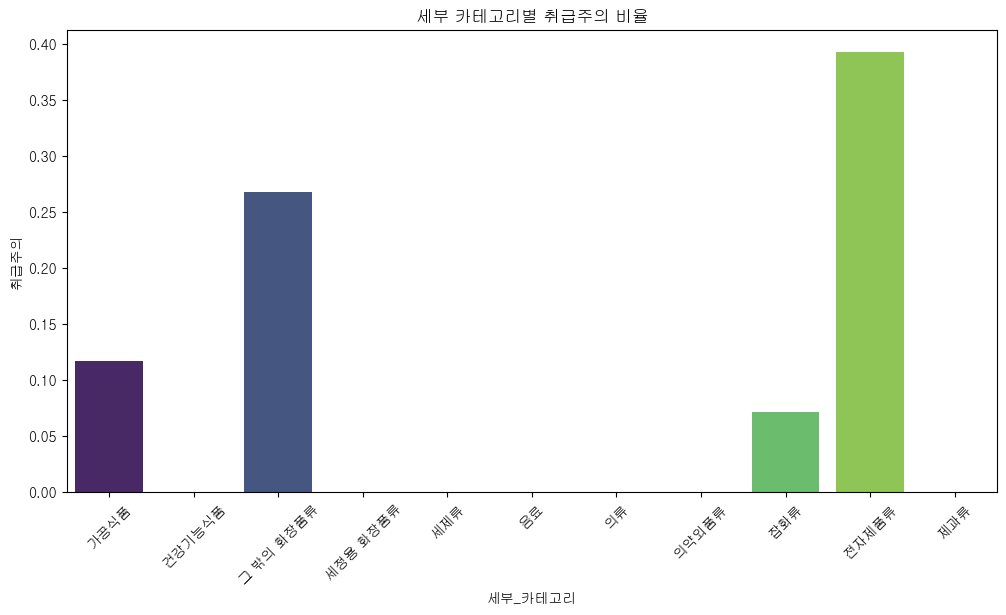

In [16]:
# 2. 세부 카테고리별 취급주의 비율
handling_ratio = df.groupby('세부_카테고리')['취급주의'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='세부_카테고리', y='취급주의', data=handling_ratio, palette='viridis')
plt.title('세부 카테고리별 취급주의 비율')
plt.xticks(rotation=45)
plt.show()


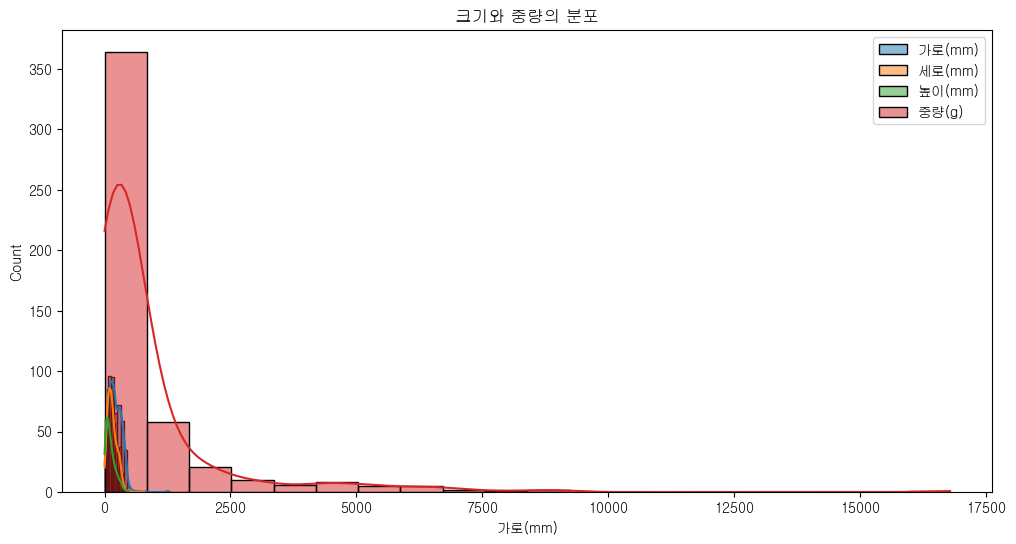

In [17]:
# 4. 크기와 중량 분포
plt.figure(figsize=(12, 6))
for col in ['가로(mm)', '세로(mm)', '높이(mm)', '중량(g)']:
    sns.histplot(df[col], kde=True, label=col, bins=20)
plt.legend()
plt.title('크기와 중량의 분포')
plt.show()

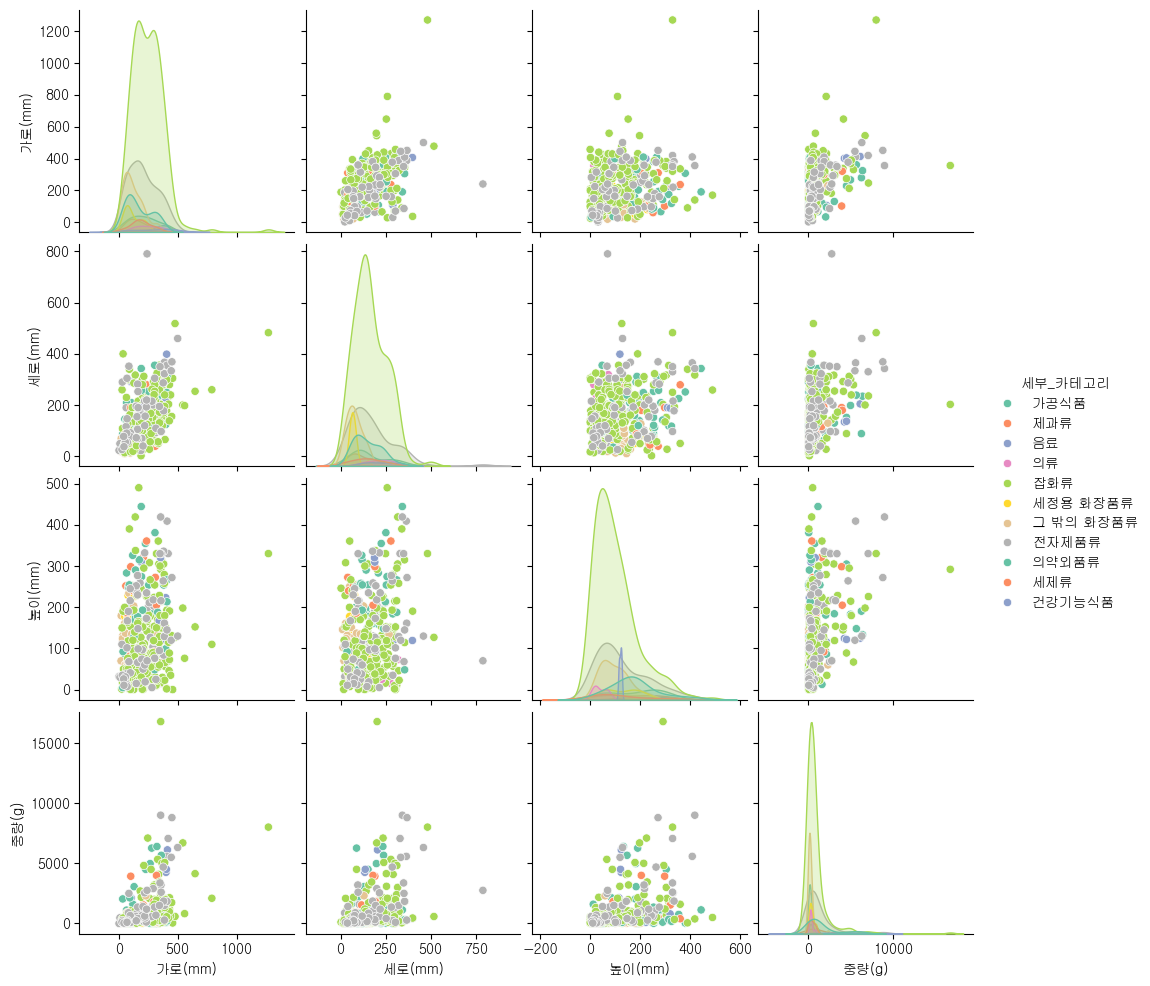

In [18]:
# 5. 다변량 분석 (Pairplot)
sns.pairplot(df, vars=['가로(mm)', '세로(mm)', '높이(mm)', '중량(g)'], hue='세부_카테고리', palette='Set2')
plt.show()

C:\Users\YNKIM\AppData\Local\Temp\ipykernel_7016\773747606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='세부_카테고리', data=df, palette='tab10')


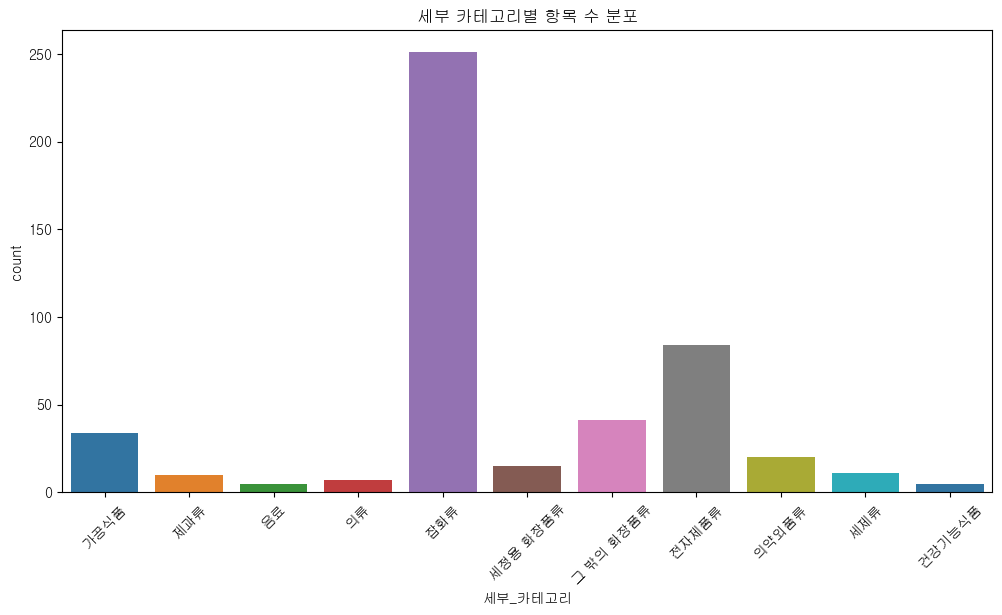

In [19]:
# 1. 세부 카테고리별 항목 수 분포
plt.figure(figsize=(12, 6))
sns.countplot(x='세부_카테고리', data=df, palette='tab10')
plt.title('세부 카테고리별 항목 수 분포')
plt.xticks(rotation=45)
plt.show()


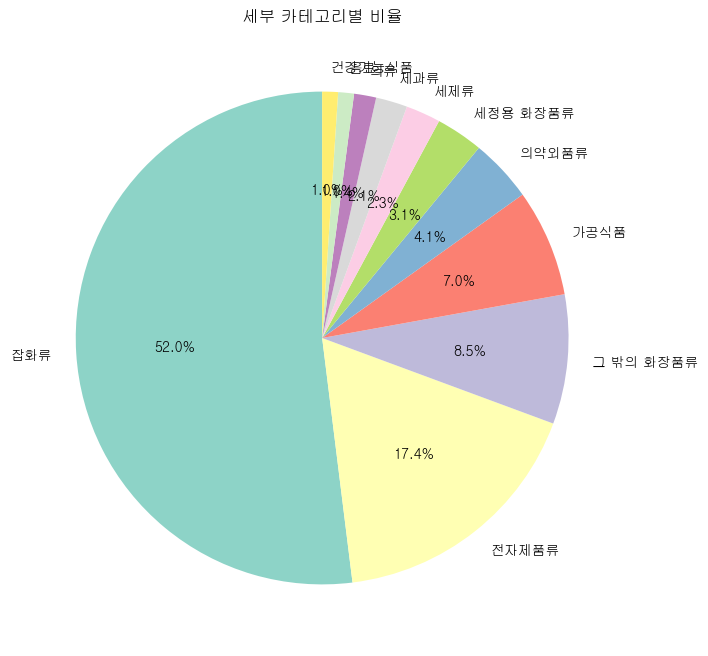

In [20]:
# 2. 세부 카테고리별 비율 비교 (파이 차트)
category_counts = df['세부_카테고리'].value_counts()
plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('세부 카테고리별 비율')
plt.ylabel('')  # y축 레이블 제거
plt.show()

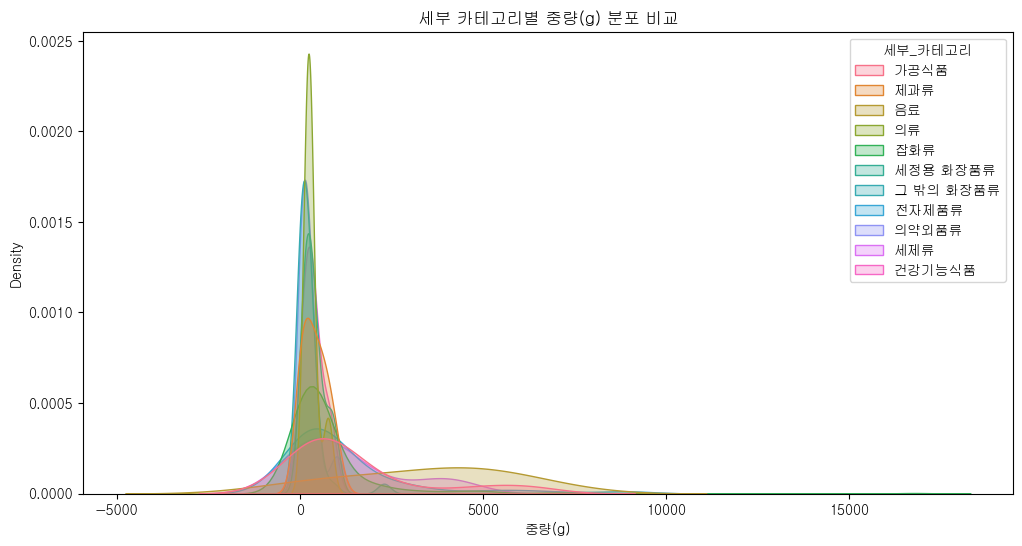

In [21]:
# 4. 중량 분포 비교 (KDE)
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='중량(g)', hue='세부_카테고리', common_norm=False, fill=True, alpha=0.3)
plt.title('세부 카테고리별 중량(g) 분포 비교')
plt.show()



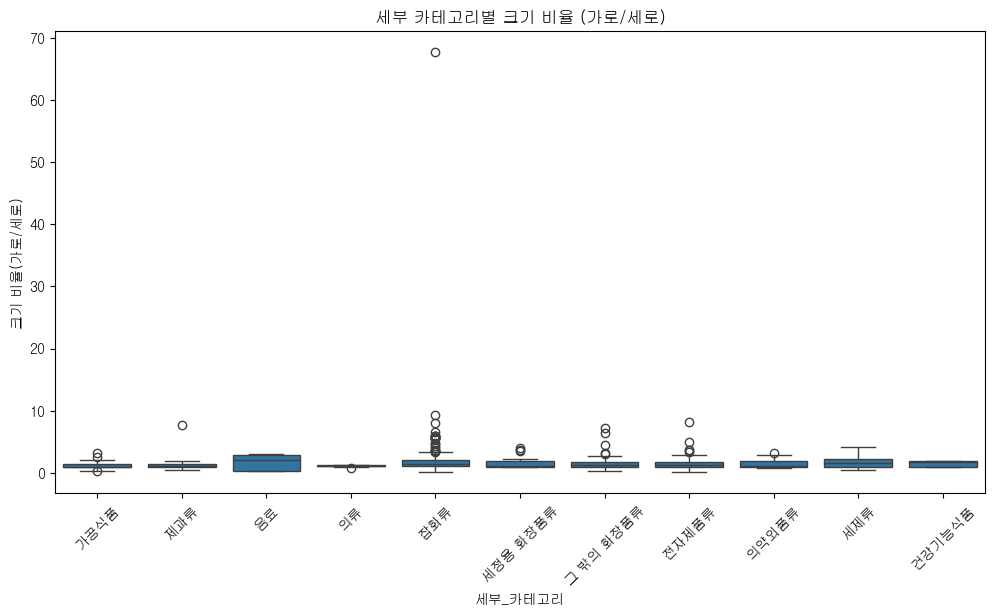

In [22]:
# 5. 카테고리별 크기 비율 비교
df['크기 비율(가로/세로)'] = df['가로(mm)'] / df['세로(mm)']
plt.figure(figsize=(12, 6))
sns.boxplot(x='세부_카테고리', y='크기 비율(가로/세로)', data=df)
plt.title('세부 카테고리별 크기 비율 (가로/세로)')
plt.xticks(rotation=45)
plt.show()

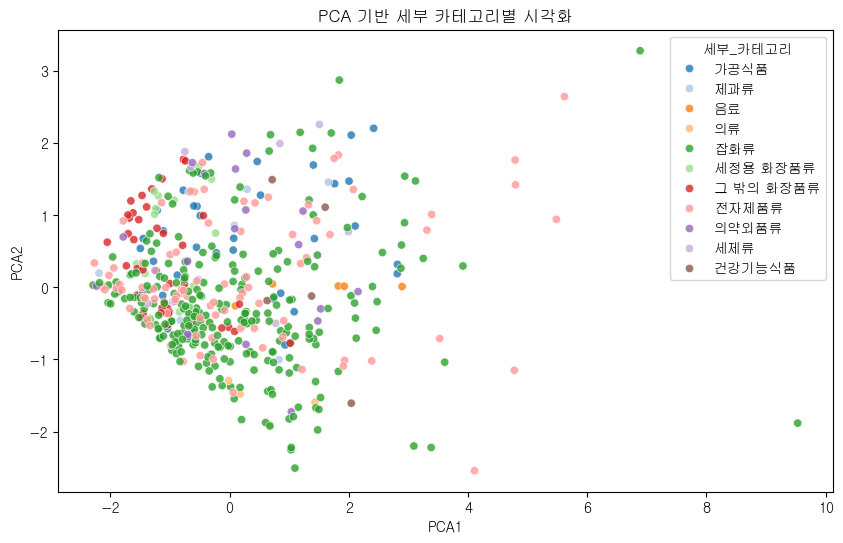

In [23]:
# 6. PCA를 사용한 2D 시각화
features = ['가로(mm)', '세로(mm)', '높이(mm)', '중량(g)']
df_scaled = StandardScaler().fit_transform(df[features])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='세부_카테고리', palette='tab20', data=df, alpha=0.8)
plt.title('PCA 기반 세부 카테고리별 시각화')
plt.show()

C:\Users\YNKIM\AppData\Local\Temp\ipykernel_7016\3659229503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='세부_카테고리', y='중량(g)', data=df, palette='muted', inner='quartile')


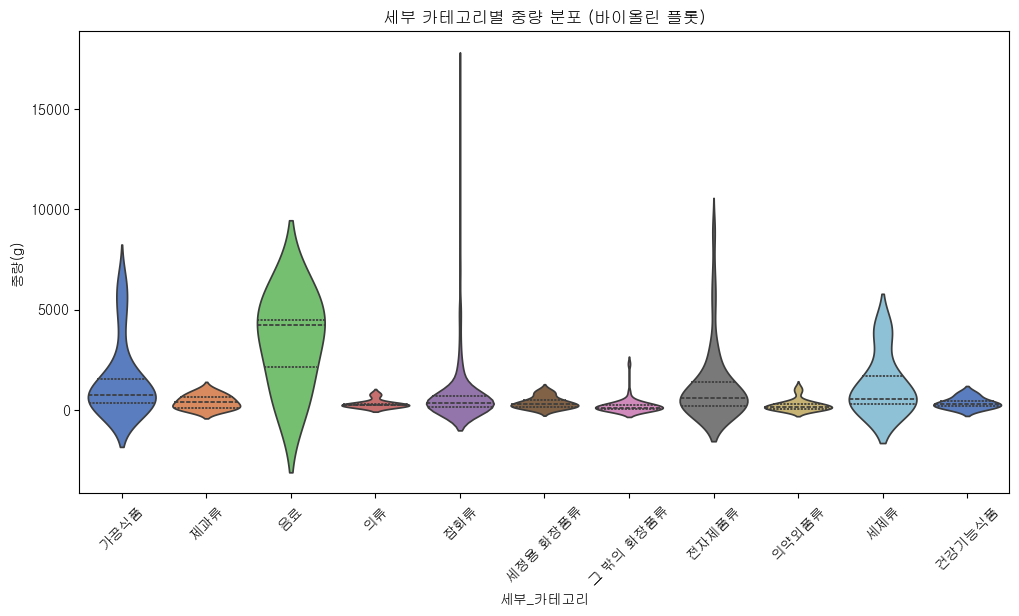

In [24]:
# 5. 바이올린 플롯으로 분포 비교
plt.figure(figsize=(12, 6))
sns.violinplot(x='세부_카테고리', y='중량(g)', data=df, palette='muted', inner='quartile')
plt.title('세부 카테고리별 중량 분포 (바이올린 플롯)')
plt.xticks(rotation=45)
plt.show()

C:\Users\YNKIM\AppData\Local\Temp\ipykernel_7016\4081982872.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_garo = df.groupby('가로(mm)_범위')['취급주의'].mean()
C:\Users\YNKIM\AppData\Local\Temp\ipykernel_7016\4081982872.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sero = df.groupby('세로(mm)_범위')['취급주의'].mean()
C:\Users\YNKIM\AppData\Local\Temp\ipykernel_7016\4081982872.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

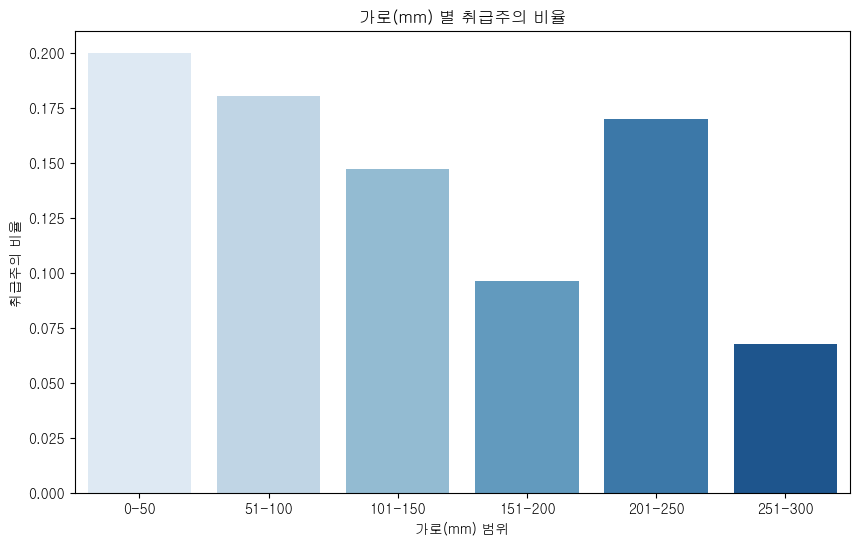

C:\Users\YNKIM\AppData\Local\Temp\ipykernel_7016\4081982872.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sero.index, y=df_sero.values, palette='Greens')


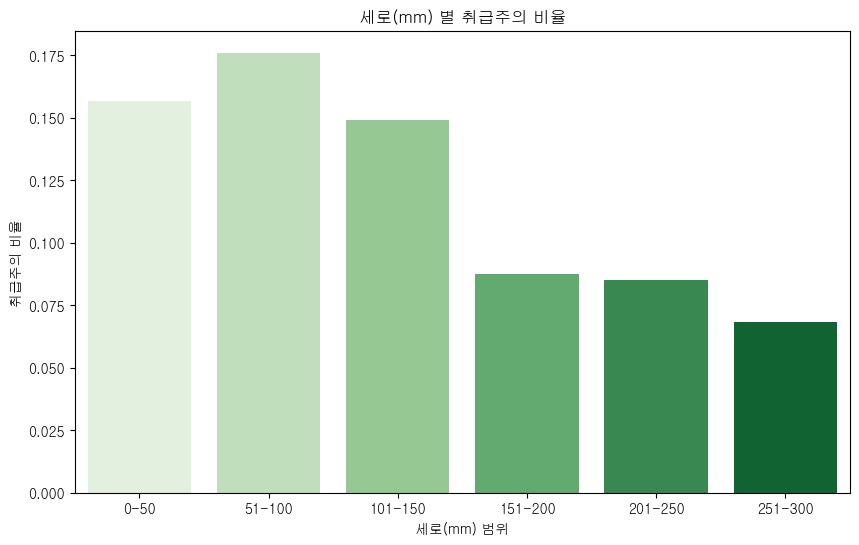

C:\Users\YNKIM\AppData\Local\Temp\ipykernel_7016\4081982872.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_height.index, y=df_height.values, palette='Reds')


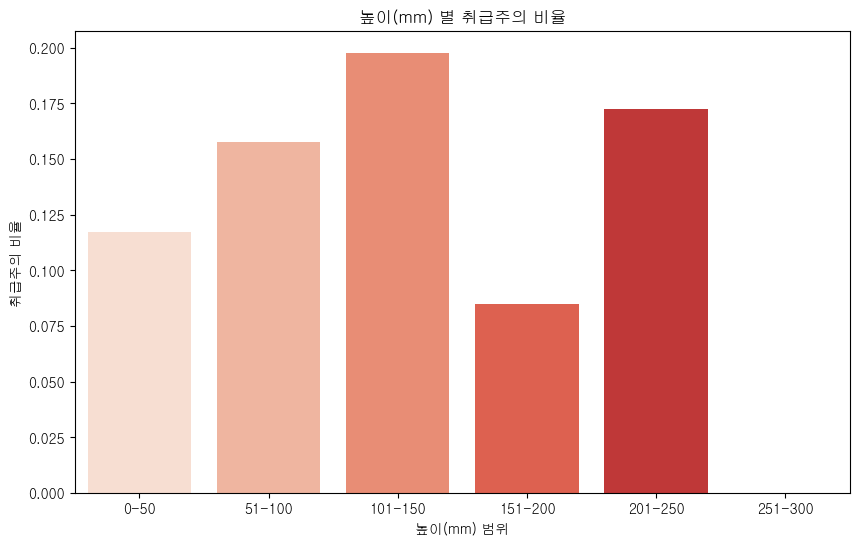

C:\Users\YNKIM\AppData\Local\Temp\ipykernel_7016\4081982872.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_joongyang.index, y=df_joongyang.values, palette='Purples')


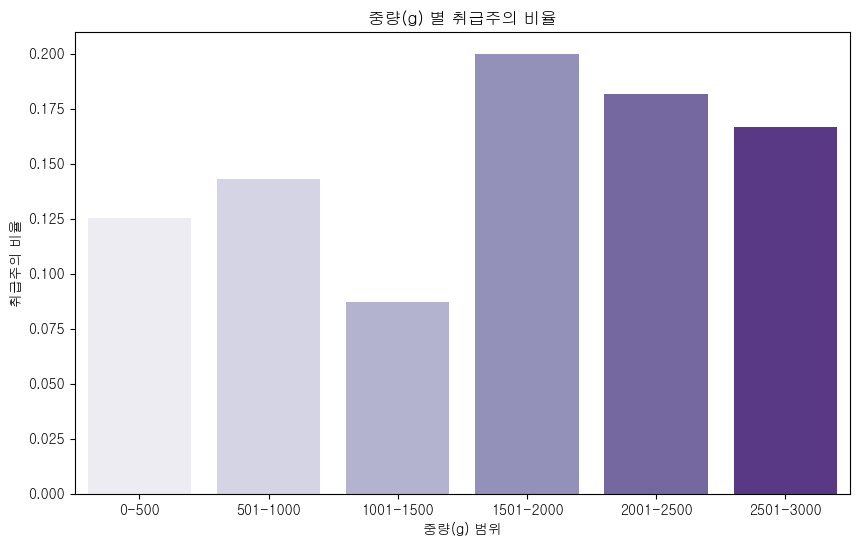

In [25]:
# 1. 가로(mm), 세로(mm), 높이(mm), 중량(g)에 따른 취급주의 비율 분석

# 가로(mm) 기준으로 취급주의 비율 계산 (범위 나누기)
df['가로(mm)_범위'] = pd.cut(df['가로(mm)'], bins=[0, 50, 100, 150, 200, 250, 300], labels=['0-50', '51-100', '101-150', '151-200', '201-250', '251-300'])

# 세로(mm) 기준으로 취급주의 비율 계산
df['세로(mm)_범위'] = pd.cut(df['세로(mm)'], bins=[0, 50, 100, 150, 200, 250, 300], labels=['0-50', '51-100', '101-150', '151-200', '201-250', '251-300'])

# 높이(mm) 기준으로 취급주의 비율 계산
df['높이(mm)_범위'] = pd.cut(df['높이(mm)'], bins=[0, 50, 100, 150, 200, 250, 300], labels=['0-50', '51-100', '101-150', '151-200', '201-250', '251-300'])

# 중량(g) 기준으로 취급주의 비율 계산 (예: 중량을 범위로 나누어서 비율을 계산)
df['중량(g)_범위'] = pd.cut(df['중량(g)'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000], labels=['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000'])

# 2. 각 범위에 대해 취급주의 비율 계산
df_garo = df.groupby('가로(mm)_범위')['취급주의'].mean()
df_sero = df.groupby('세로(mm)_범위')['취급주의'].mean()
df_height = df.groupby('높이(mm)_범위')['취급주의'].mean()
df_joongyang = df.groupby('중량(g)_범위')['취급주의'].mean()

# 3. 결과 시각화

# 가로(mm) 별 취급주의 비율
plt.figure(figsize=(10, 6))
sns.barplot(x=df_garo.index, y=df_garo.values, palette='Blues')
plt.title('가로(mm) 별 취급주의 비율')
plt.xlabel('가로(mm) 범위')
plt.ylabel('취급주의 비율')
plt.show()

# 세로(mm) 별 취급주의 비율
plt.figure(figsize=(10, 6))
sns.barplot(x=df_sero.index, y=df_sero.values, palette='Greens')
plt.title('세로(mm) 별 취급주의 비율')
plt.xlabel('세로(mm) 범위')
plt.ylabel('취급주의 비율')
plt.show()

# 높이(mm) 별 취급주의 비율
plt.figure(figsize=(10, 6))
sns.barplot(x=df_height.index, y=df_height.values, palette='Reds')
plt.title('높이(mm) 별 취급주의 비율')
plt.xlabel('높이(mm) 범위')
plt.ylabel('취급주의 비율')
plt.show()

# 중량(g) 별 취급주의 비율
plt.figure(figsize=(10, 6))
sns.barplot(x=df_joongyang.index, y=df_joongyang.values, palette='Purples')
plt.title('중량(g) 별 취급주의 비율')
plt.xlabel('중량(g) 범위')
plt.ylabel('취급주의 비율')
plt.show()


박스 크기 초과 물품의 총 개수: 12
초과 물품의 항목과 세부 카테고리:
                                  항목 세부_카테고리
146                  SKYSPER 하이킹 백팩      잡화류
219  Momcozy KleanPal Pro 유아용 젖병 세척기   전자제품류
295                           고압 세척기   전자제품류
305                        차량용 햇빛가리개     잡화류
312                           주차 스토퍼     잡화류
331                           정관장 홍삼  건강기능식품
404                             바이올린     잡화류
405                             우쿨렐레     잡화류
407                              색소폰     잡화류
409                               첼로     잡화류
479                             전자드럼   전자제품류
480                            전자키보드   전자제품류


C:\Users\YNKIM\AppData\Local\Temp\ipykernel_7016\1877344486.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=초과_물품_분포.index, y=초과_물품_분포.values, palette='viridis')


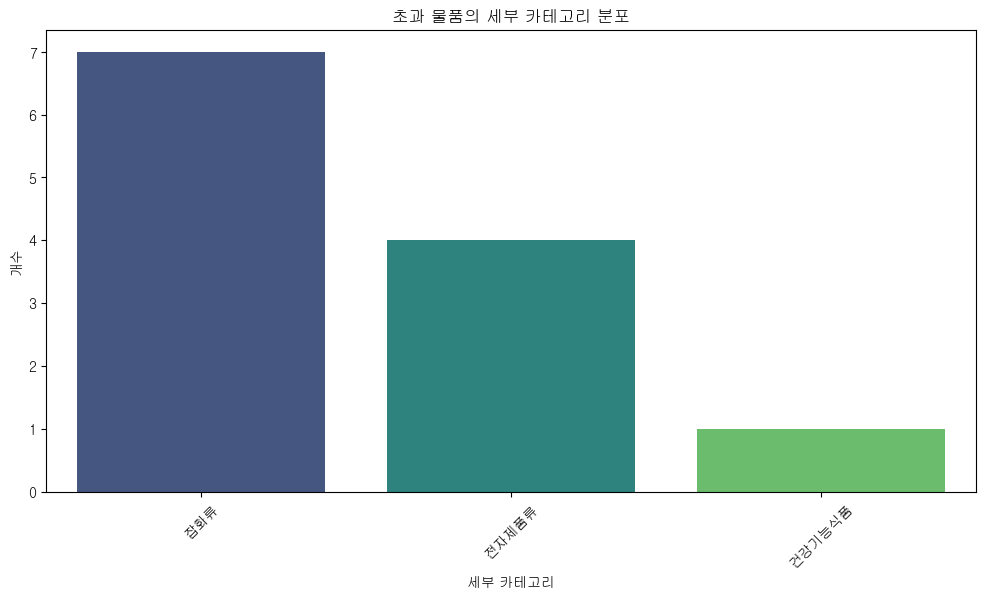

In [30]:
# 박스 크기 정의
박스_크기 = (480, 380, 340)

# 초과 여부 판단 함수
def 초과여부(물건_치수, 박스_크기):
    for 조합 in permutations(물건_치수):  # 모든 치수 조합 생성
        if all(c <= b for c, b in zip(조합, 박스_크기)):  # 치수가 박스에 들어갈 수 있는지 확인
            return False  # 하나의 조합이라도 들어갈 수 있으면 초과하지 않음
    return True  # 모든 조합이 박스보다 크면 초과

# 초과 물품 필터링
df['초과여부'] = df.apply(lambda row: 초과여부((row['가로(mm)'], row['세로(mm)'], row['높이(mm)']), 박스_크기), axis=1)
초과_물품 = df[df['초과여부']]

# 초과 물품의 총 개수
초과_물품_총개수 = len(초과_물품)
print(f"박스 크기 초과 물품의 총 개수: {초과_물품_총개수}")

# 초과 물품의 세부 카테고리 분포
초과_물품_분포 = 초과_물품['세부_카테고리'].value_counts()

# 초과 물품의 항목과 세부 카테고리
초과_물품_항목 = 초과_물품[['항목', '세부_카테고리']]

# 결과 출력
print("초과 물품의 항목과 세부 카테고리:")
print(초과_물품_항목)

# 초과 물품의 세부 카테고리 분포 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=초과_물품_분포.index, y=초과_물품_분포.values, palette='viridis')
plt.title('초과 물품의 세부 카테고리 분포')
plt.xlabel('세부 카테고리')
plt.ylabel('개수')
plt.xticks(rotation=45)
plt.show()